<ipython-input-52-668b09854d1b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster_DCs["Total CD141+"]=df_Cluster_pts_DCcount["CD141+PD-L1+"]+df_Cluster_pts_DCcount["CD141+PD-L1-"]
<ipython-input-52-668b09854d1b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cluster_DCs["Total CD1a+"]=df_Cluster_pts_DCcount["CD1a+"]+df_Cluster_pts_DCcount["CD1a+PD-L1+"]+df_Cluster_pts_DCcount["CD1a+PD-L1-"]
<ipython-input-52-668b09854d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of

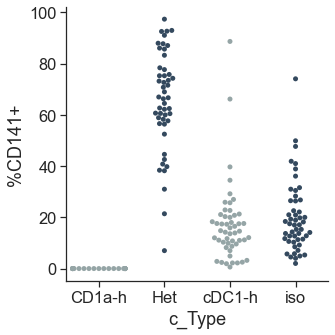

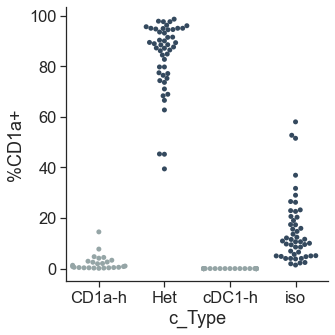

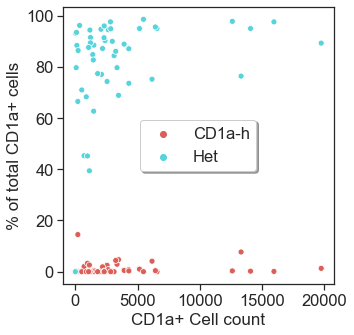

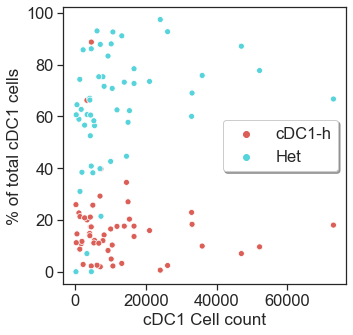

In [52]:
# Portion of cells found in the clusters
df_Cluster_pv2 = pd.read_csv("C:/Data/DCs_results/c_Type.txt")
# Remove control samples
df_Cluster_pts = df_Cluster_pv2[~df_Cluster_pv2["Pt"].isin(["Norm LN1x4","Norm LN2x4","Norm LN3x4","Norm LN4x4"])]
df_Cluster_pts_DCcount = df_Cluster_pts.pivot_table(index = ["Pt", "c_Type"], values=["CD141+PD-L1+","CD141+PD-L1-",
"CD1a+","CD1a+PD-L1+","CD1a+PD-L1-"], aggfunc= np.sum)
df_Cluster_pts_DCcount.reset_index(inplace = True) 

# Sum the cells per specimen
df_Cluster_DCs = df_Cluster_pts_DCcount[["Pt","c_Type"]]
df_Cluster_DCs["Total CD141+"]=df_Cluster_pts_DCcount["CD141+PD-L1+"]+df_Cluster_pts_DCcount["CD141+PD-L1-"]
df_Cluster_DCs["Total CD1a+"]=df_Cluster_pts_DCcount["CD1a+"]+df_Cluster_pts_DCcount["CD1a+PD-L1+"]+df_Cluster_pts_DCcount["CD1a+PD-L1-"]
Total_DCs = df_Cluster_DCs.pivot_table(index = ["Pt"], values = ["Total CD141+", "Total CD1a+"],
aggfunc = np.sum)
Total_DCs.reset_index(inplace = True) 
Total_DCs_ = Total_DCs.rename(columns = {"Total CD141+":"Total CD141+_Sum","Total CD1a+":"Total CD1a+_Sum"}) 

# Calculating the proportaion
All_ = pd.merge(df_Cluster_DCs, Total_DCs_, how = "outer")
dedication_to_cluster = All_[["Pt", "c_Type"]]
dedication_to_cluster["%CD141+"] = 100*All_["Total CD141+"]/All_["Total CD141+_Sum"]
dedication_to_cluster["%CD1a+"] = 100*All_["Total CD1a+"]/All_["Total CD1a+_Sum"]
dedication_to_cluster = dedication_to_cluster.round(1)
dedication_to_cluster.to_csv("C:/Data/DCs_results/DCs_dedicated_to_Cluster.txt")

# plot 
names = ["%CD141+","%CD1a+"]
flatui = [  "#95a5a6",  "#34495e"]

for i, t in enumerate(names):
    sns.catplot(data = dedication_to_cluster, x ="c_Type", y = t, kind = "swarm", palette= flatui)
    
    
    
    
    
 
# Plot DCs count vs. % of them are found in some type of clusters
dedication_to_cluster1 = dedication_to_cluster.drop(columns="Unnamed: 0").pivot_table(index = "Pt", columns=["c_Type"])
dedication_to_cluster1.reset_index(inplace = True)
c_Type = pd.read_csv("C:/Data/DCs_results/c_Type.txt")
sum_dc = c_Type.pivot_table(index="Pt", aggfunc= lambda x:sum(x))
sum_dc.reset_index(inplace = True)
dc_count_to_c = sum_dc[["Pt"]]
dc_count_to_c["cDC1_ct"] = sum_dc["CD141+PD-L1+"] + sum_dc["CD141+PD-L1-"]
dc_count_to_c["CD1a+_ct"] = sum_dc["CD1a+PD-L1+"] + sum_dc["CD1a+PD-L1-"] + sum_dc["CD1a+"]
dc_count_to_c["CD1a+_%h"] = dedication_to_cluster1[( '%CD1a+', 'CD1a-h')]
dc_count_to_c["CD1a+_%het"] = dedication_to_cluster1[( '%CD1a+', 'Het')]
dc_count_to_c["cDC1_%h"] = dedication_to_cluster1[('%CD141+', 'cDC1-h')]
dc_count_to_c["cDC1_%het"] = dedication_to_cluster1[('%CD141+', 'Het')]
dc_count_to_c1 = dc_count_to_c.fillna(0)
dc_count_to_c1.to_csv("C:/Data/DCs_dedicated_to_Cluster_TotDCs.txt")

# Remove control samples
dc_count_to_c1 = dc_count_to_c1[~dc_count_to_c1["Pt"].isin(['Norm LN1x4', 'Norm LN2x4', 'Norm LN3x4', 'Norm LN4x4'])]

# CD1a+ (first type of cell participating DBSCAN cluster)
cd1a = dc_count_to_c1.melt(id_vars="CD1a+_ct", value_vars=["CD1a+_%h","CD1a+_%het"])
cd1a_1 = cd1a.replace({"variable":{"CD1a+_%h":"CD1a-h", "CD1a+_%het":"Het"}})
cd1a_2 = cd1a_1.rename(columns={"variable":"Type of DC clusters"})
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
plt.figure(figsize=(5.25,5))
g = sns.scatterplot(x = "CD1a+_ct", y = "value", hue = "Type of DC clusters",data = cd1a_2, palette="hls")
plt.xlabel('CD1a+ Cell count', fontsize=17)
plt.ylabel('% of total CD1a+ cells', fontsize=17)
handles, labels = g.get_legend_handles_labels()  #remove legened title
g.legend(handles=handles[1:], labels=labels[1:], loc='center', frameon=1, shadow=True)
plt.tight_layout()
g.figure.savefig('C:/Data/DCs_results/fig1_dedic_CD1a.tiff', format='tiff', dpi=600)
plt.show(g)

# cDC1 (second type of cell participating DBSCAN cluster)
cDC1 = dc_count_to_c1.melt(id_vars="cDC1_ct", value_vars=["cDC1_%h","cDC1_%het"])
cDC1_1 = cDC1.replace({"variable":{"cDC1_%h":"cDC1-h", "cDC1_%het":"Het"}})
cDC1_2 = cDC1_1.rename(columns={"variable":"Type of DC clusters"})
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
plt.figure(figsize=(5.25,5))
g = sns.scatterplot(x = "cDC1_ct", y = "value", hue = "Type of DC clusters",data = cDC1_2, palette="hls")
plt.xlabel('cDC1 Cell count', fontsize=17)
plt.ylabel('% of total cDC1 cells', fontsize=17)
handles, labels = g.get_legend_handles_labels()  #remove legened title
g.legend(handles=handles[1:], labels=labels[1:], loc='center right', frameon=1, shadow=True)
plt.tight_layout()
g.figure.savefig('C:/Data/DCs_results/fig1_dedic_cDC1.tiff', format='tiff', dpi=600)
plt.show(g)